In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

(370, 2) (370,)


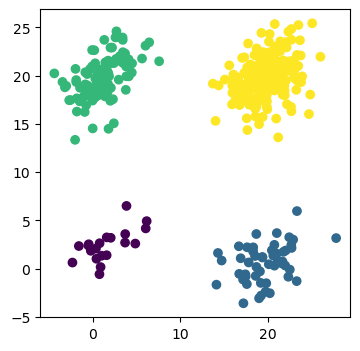

In [8]:
n_clusters = 4
samples = [20, 50, 100, 200]
centroids = [[1,1], [20,1], [1,20], [20,20]]
covariances = [[[5,2], [2,5]]]*n_clusters # same for all clusters (easy) : modify if required

X = []
Y = []

for i in range(n_clusters):
    mean = centroids[i]
    cov = covariances[i]
    num = samples[i]
    x1,x2 = np.random.multivariate_normal(mean, cov, num).T
    X.append(np.stack([x1,x2], axis=1))
    Y.append([i]*num)
    
Y = np.concatenate(Y)
X = np.concatenate(X)
print(X.shape, Y.shape)

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

__Steps__
1. Define number of clusters = k
2. Randomly pick k points as centroid
3. calculate distance of each point from k centroids
4. find closest point and transfer label
5. Get new k centroids as mean of each cluster
6. Repeat steps 2-5 until convergence

__Convergence condition__
1. cluster assignment does not change
2. cluster assignment does not change more than a set threshold
3. Max number of iterations
2. Centroid is stable and does not change more than a set threshold

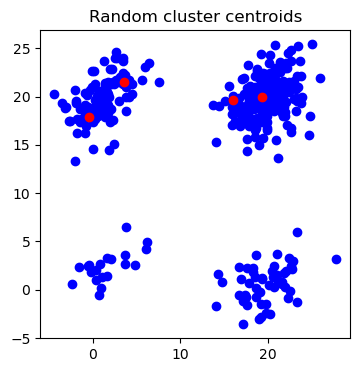

In [21]:
k = 4
n = X.shape[0]
k_centroids = X[random.sample(list(range(n)), k)]

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c = 'blue')
plt.scatter(k_centroids[:,0], k_centroids[:,1], c = 'red')
plt.title('Random cluster centroids')
plt.show()

In [22]:
max_itrs = 10
all_clusters = []
all_centroids = []
for itr in range(max_itrs):
    distance_matrix = np.zeros((n,k))

    for i in range(n):
        for j in range(k):
            distance_matrix[i,j] = np.linalg.norm(X[i]-k_centroids[j]) # L2 norm


    clusters = np.argmin(distance_matrix, axis=1)
    all_clusters.append(clusters)
    
    new_centroids = []
    for c in range(k):
        idxs = (clusters==c).nonzero()[0]
        cluster_points = X[idxs]
        new_center = np.mean(cluster_points, axis=0)
        new_centroids.append(new_center)

    new_centroids = np.stack(new_centroids, axis=0)
    k_centroids = new_centroids
    all_centroids.append(k_centroids)
    
    

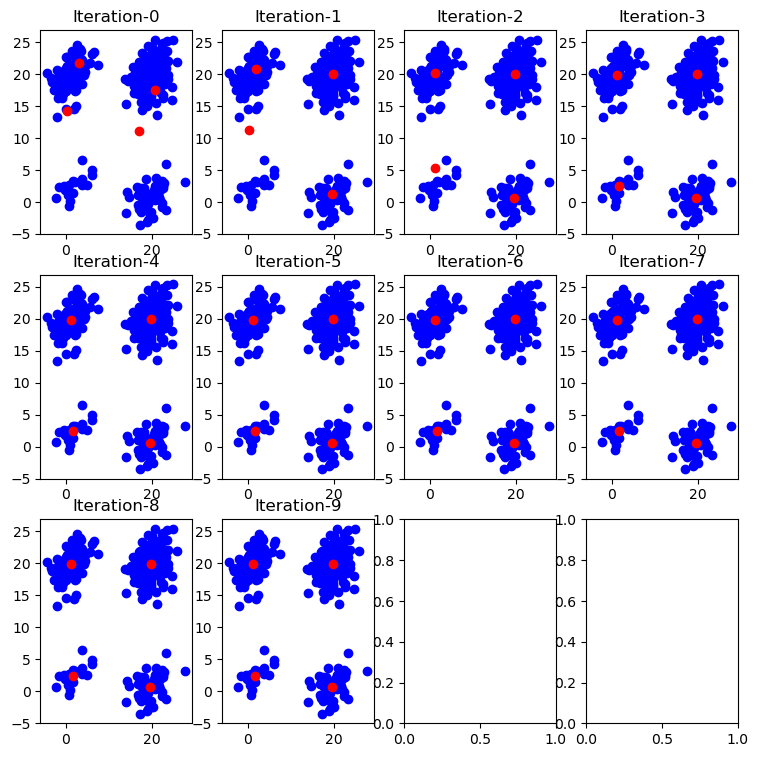

In [23]:
fig, axs = plt.subplots(nrows=3, ncols= len(all_centroids)//3+1, figsize=(9, 9))
axs = axs.flatten()

for i in range(len(all_centroids)):
    axs[i].scatter(X[:,0], X[:,1], c = 'blue')
    axs[i].scatter(all_centroids[i][:,0], all_centroids[i][:,1], c = 'red')
    axs[i].title.set_text(f'Iteration-{i}')
plt.show()
    


<a href="https://medium.com/@mgupta70/interview-prep-k-means-clustering-55649a1f6804"> Click here</a> for for intriguing __Q&A__ on K-Means Regression :)